### Lv3 모델링 1/4 python 파이썬 랜덤 포레스트 정의

We're going to use Random Forest model.<br>

For now, we're going to classify the wine data.<br>

In [1]:
# Import random forest model
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Assign the classification mode to the variable 'random_forest'
random_forest = RandomForestClassifier()

# Check if the model is loaded properly
print(random_forest)

RandomForestClassifier()


### Lv3 모델링 2/4 python 파이썬 모델 랜덤 포레스트 실습

In [3]:
# Download the data
!wget 'https://bit.ly/3i4n1QB'

import zipfile
with zipfile.ZipFile('3i4n1QB', 'r') as existing_zip:
    existing_zip.extractall('data')

--2022-09-13 16:46:45--  https://bit.ly/3i4n1QB
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw [following]
--2022-09-13 16:46:45--  https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw
Resolving drive.google.com (drive.google.com)... 172.217.25.174, 2404:6800:400a:813::200e
Connecting to drive.google.com (drive.google.com)|172.217.25.174|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/q14m542d2ikrslm8is45mveq1fhqeuu2/1663055175000/17946651057176172524/*/1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw?e=download&uuid=9b7da502-bea9-462e-8d4b-4337b141ed66 [following]
--2022-09-13 16:46:46--  https://doc-10-10-docs.googleusercon

In [4]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt

# Set the matplotlib library enable to print the result in Jupyter notebook
%matplotlib inline

import time

In [5]:
# Load data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Check the information and the shape, first 5 items
print('=========== Train data ===========\n')
print(train.info(), '\n')
print(train.shape, '\n')
print(train.head(), '\n\n')
print('=========== Test data ===========\n')
print(test.info(), '\n')
print(test.shape, '\n')
print(test.head(), '\n')

=========== Train data ===========

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)


In [6]:
# See if there are any null value
print(train.isnull().sum(), '\n')
print(test.isnull().sum())

index                   0
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64 

index                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64


In [7]:
# See the summary of data
train.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


<AxesSubplot:>

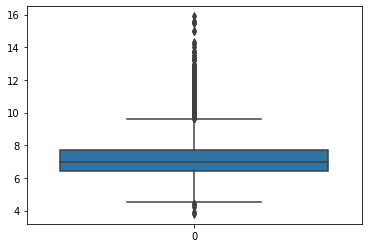

In [8]:
# Check if there are any outliers through visualization

# The features other than the 'fixed acidity' determines the quality of the wine,
# so let's focus on the fixed acidity only
sns.boxplot(data = train['fixed acidity'])

In [9]:
# Declare the scaler, train it
scaler = MinMaxScaler()
scaler.fit(train[['fixed acidity']])

# Change the 'fixed acidity' of the train and test data using 'scaler'
# Save the changed data into a new column 'Scaled fixed acidity'
train['Scaled fixed acidity'] = scaler.transform(train[['fixed acidity']])
test['Scaled fixed acidity'] = scaler.transform(test[['fixed acidity']])

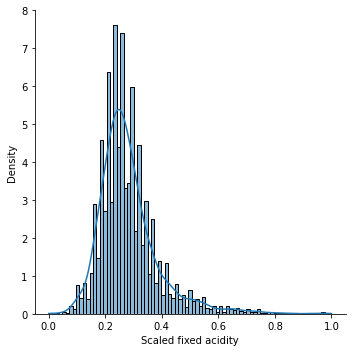

In [10]:
# Visualize the distribution plot for the scaled feature
sns.displot(train['Scaled fixed acidity'], kde=True, stat='density', linewidth=1)

In [11]:
# Enconde the data: One-hot encoding
encoder = OneHotEncoder()
encoder.fit(train[['type']])
encoder.fit(test[['type']])

OneHotEncoder()

In [12]:
onehot = encoder.transform(train[['type']])
print('======= onehot =======\n', onehot, '\n')

onehot_arr = onehot.toarray()
print('======= onehot_arr =======\n', onehot_arr, '\n')

onehot_df = pd.DataFrame(onehot_arr)
print('======= onehot_df =======\n', onehot_df, '\n')

======= onehot =======
   (0, 1)	1.0
  (1, 0)	1.0
  (2, 1)	1.0
  (3, 1)	1.0
  (4, 1)	1.0
  (5, 1)	1.0
  (6, 1)	1.0
  (7, 1)	1.0
  (8, 1)	1.0
  (9, 1)	1.0
  (10, 0)	1.0
  (11, 1)	1.0
  (12, 1)	1.0
  (13, 1)	1.0
  (14, 0)	1.0
  (15, 1)	1.0
  (16, 0)	1.0
  (17, 1)	1.0
  (18, 1)	1.0
  (19, 1)	1.0
  (20, 1)	1.0
  (21, 0)	1.0
  (22, 1)	1.0
  (23, 0)	1.0
  (24, 0)	1.0
  :	:
  (5472, 0)	1.0
  (5473, 1)	1.0
  (5474, 1)	1.0
  (5475, 1)	1.0
  (5476, 1)	1.0
  (5477, 1)	1.0
  (5478, 1)	1.0
  (5479, 0)	1.0
  (5480, 1)	1.0
  (5481, 0)	1.0
  (5482, 1)	1.0
  (5483, 0)	1.0
  (5484, 1)	1.0
  (5485, 1)	1.0
  (5486, 1)	1.0
  (5487, 0)	1.0
  (5488, 1)	1.0
  (5489, 1)	1.0
  (5490, 0)	1.0
  (5491, 1)	1.0
  (5492, 1)	1.0
  (5493, 1)	1.0
  (5494, 1)	1.0
  (5495, 1)	1.0
  (5496, 1)	1.0 

======= onehot_arr =======
 [[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]] 

======= onehot_df =======
         0    1
0     0.0  1.0
1     1.0  0.0
2     0.0  1.0
3     0.0  1.0
4     0.0  1.0
...   ...  ...
5492  

In [13]:
# Change the column names from 0, 1 to their feature name
onehot_df.columns = encoder.get_feature_names_out()

# See if the process is done properly
onehot_df.head()

,type_red,type_white
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [14]:
# Merge onehot_df into its original data
train = pd.concat([train, onehot_df], axis=1)

# Check if the process is done properly
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,Scaled fixed acidity,type_red,type_white
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white,0.148760,0.0,1.0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red,0.413223,1.0,0.0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white,0.338843,0.0,1.0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white,0.264463,0.0,1.0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white,0.330579,0.0,1.0


In [15]:
# Check the dimension of train
train.shape

(5497, 17)

In [16]:
# Check the type of train
print(type(train))

# Check the features names
print(train.columns)

<class 'pandas.core.frame.DataFrame'>
Index(['index', 'quality', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'type',
       'Scaled fixed acidity', 'type_red', 'type_white'],
      dtype='object')


In [17]:
print(train['type'])

0       white
1         red
2       white
3       white
4       white
        ...  
5492    white
5493    white
5494    white
5495    white
5496    white
Name: type, Length: 5497, dtype: object


In [18]:
# Separate feature 'type' from 'train'
# MARK: We need to consider the order of the code.
train_type = train['type']
train = train.drop(columns = ['type'])
print(train_type.shape)
print(train.shape)

(5497,)
(5497, 16)


In [19]:
# See if the process is done properly
print('======== train_type ========\n', train_type.head(), '\n')
print('======== train ========\n', train.head(), '\n')

======== train_type ========
 0    white
1      red
2    white
3    white
4    white
Name: type, dtype: object 

======== train ========
    index  quality  fixed acidity  volatile acidity  citric acid  \
0      0        5            5.6             0.695         0.06   
1      1        5            8.8             0.610         0.14   
2      2        5            7.9             0.210         0.39   
3      3        6            7.0             0.210         0.31   
4      4        6            7.8             0.400         0.26   

   residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0             6.8      0.042                  9.0                  84.0   
1             2.4      0.067                 10.0                  42.0   
2             2.0      0.057                 21.0                 138.0   
3             6.0      0.046                 29.0                 108.0   
4             9.5      0.059                 32.0                 178.0   

   densi

In [20]:
# Do the same process for the test data
onehot = encoder.transform(test[['type']])
onehot_arr = onehot.toarray()
onehot_df = pd.DataFrame(onehot_arr)
onehot_df.columns = encoder.get_feature_names_out()
test = pd.concat([test, onehot_df], axis = 1)

test_type = test['type']
test = test.drop(columns = ['type'])

test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Scaled fixed acidity,type_red,type_white
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,0.429752,0.0,1.0
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,0.785124,1.0,0.0
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,0.223140,0.0,1.0
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,0.280992,0.0,1.0
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,0.247934,0.0,1.0


In [21]:
# Initiate random forest classifier model as variable 'random_classifier'
random_classifier = RandomForestClassifier()

In [22]:
# Store data 'train' to variable 'X' except the feature 'quality'
X = train.drop(columns = ['quality'])

In [23]:
# Store data 'train' to variable 'y' for the feature 'quality'
y = train['quality']

In [24]:
# Train random_classifier using X and y
random_classifier.fit(X, y)

RandomForestClassifier()

### Lv3 모델링 3/4 python 파이썬 교차검증(Cross-validation)

We usually split the data into two different types: training data and test data.<br>
This 'splitting' process is called 'hold-out', and their portion goes to 8:2 or 7:3, or 9:1, whatever the researcher wants.<br>

However, if you simply split the data, the test data is being like treated as discarded data because we do not use it for training.<br>

Some algorithms are suggested to utilize this somewhat discarded data while we train a model. We classify these algorithms as cross-validation, and its representative example is the "**K-fold cross validation**", or simply, "**K-fold**".<br>

- Note: there are several types of cross-validation, such as:
    - Leave p out cross-validation.
    - Leave one out cross-validation.
    - Holdout cross-validation.
    - Repeated random subsampling validation.
    - k-fold cross-validation.
    - Stratified k-fold cross-validation.
    - Time Series cross-validation.
    - Nested cross-validation.

In K-fold, K means the number of sub-datasets we are going to split. If we split the original dataset into five seb-datasets, it looks as follows:

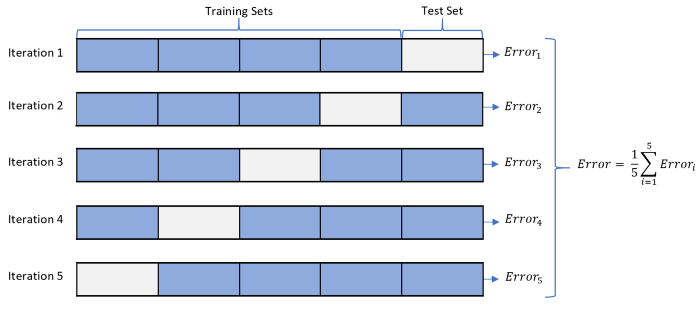

The general procedure of K-fold is as follows:

1. Shuffle the dataset randomly.
2. Split the dataset into k groups of independent dataset. For each unique group:
    - 2.1. Take the group as a hold out or test data set
    - 2.2. Take the remaining groups as a training data set
    - 2.3. Fit a model on the training set and evaluate it on the test set
    - 2.4. Retain the evaluation score and discard the model
3. Summarize the skill of the model using the sample of model evaluation scores.

In [25]:
# Let's split the original data into five sub-datasets
kf = KFold(n_splits = 5, shuffle = False)

# We can shuffle the sub-datasets using shuffle = True option.
# When we use the `shuffle = True` option, we also can use the random_state = AnyNumberYouWantToUse option.
# This option allows our model to reproduce exactly the same result when we re-run it.

In [26]:
# Using for statement, approach each sub-datasets
for train_idx, valid_idx in kf.split(train):
    train_data = train.iloc[train_idx]
    valid_data = train.iloc[valid_idx]

<function matplotlib.pyplot.show(close=None, block=None)>

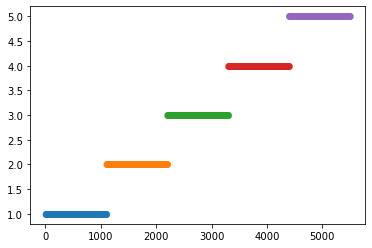

In [27]:
# Visualize the sub-datasets using sctterplot
train_idx_stored = []
valid_idx_stored = []

i = 1

for train_idx, valid_idx in kf.split(train):
    plt.scatter(valid_idx, [i for x in range(len(valid_idx))], alpha = 0.1)
    i += 1

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

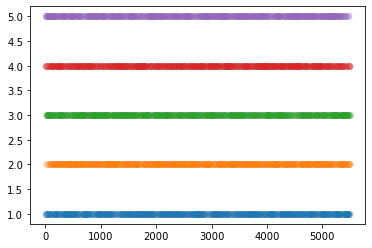

In [28]:
# We can do as above, but we're going to shuffle the data
# Let's split the original data into five sub-datasets
kf = KFold(n_splits = 5, shuffle = True, random_state = 2022)

train_idx_shuffled_stored = []
test_idx_shuffled_stored = []

i = 1

for train_idx, valid_idx in kf.split(train):
    plt.scatter(valid_idx, [i for x in range(len(valid_idx))], alpha = 0.1)
    i += 1

plt.show

### Lv3 모델링 4/4 python 파이썬 교차검증 실습

For now, we're going to use the mode of the values, because the mode is a value that has the highest probability of being appeared.

In [29]:
# Store train data except parameter 'index' and 'quality' into variable 'X'
X = train.drop(columns = ['index', 'quality'])

# Store parameter 'quality' into variable 'y'
y = train['quality']

In [30]:
# Check whether X and y contain the intended data properly
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Scaled fixed acidity,type_red,type_white
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0.148760,0.0,1.0
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0.413223,1.0,0.0
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0.338843,0.0,1.0
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0.264463,0.0,1.0
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0.330579,0.0,1.0


In [31]:
y.head()

0    5
1    5
2    5
3    6
4    6
Name: quality, dtype: int64

In [32]:
# Declare KFlod method into variable 'kf'
# Split the data into five sub-dataset, shuffle the data, set a random state to reprduce the exact same result

kf = KFold(n_splits = 5, shuffle = True, random_state = 2022)

# Check if the variable kf store the KFlod method
kf

KFold(n_splits=5, random_state=2022, shuffle=True)

In [33]:
# Declare RandomForestClassifier in variable 'model'
model = RandomForestClassifier(random_state = 2022)

# Declare a variable to store the model performances
valid_scores = []

# Declare a variable to store the prediction results
test_predictions = []

In [34]:
# Using the splitted sub-datasets, train the model
start_time = time.time()

for train_idx, validation_idx in kf.split(X, y):
    X_train = X.iloc[train_idx]
    y_train = y.iloc[train_idx]
    
    X_validation = X.iloc[validation_idx]
    y_validation = y.iloc[validation_idx]
    
    model.fit(X_train, y_train)

end_time = time.time()

print('Processing time: ', end_time - start_time, 'seconds')

Processing time:  2.619266986846924 seconds


In [35]:
# Store the prediction data into variable 'valid_prediction'
start_time = time.time()

for train_idx, validation_idx in kf.split(X, y):
    X_train = X.iloc[train_idx]
    y_train = y.iloc[train_idx]
    
    X_validation = X.iloc[validation_idx]
    y_validation = y.iloc[validation_idx]
    
    model.fit(X_train, y_train)
    
end_time = time.time()

print('Processing time: ', end_time - start_time, 'seconds')

valid_prediction = model.predict(X_validation)

Processing time:  2.525059938430786 seconds


In [36]:
# Let's predict the model performance
for train_idx, validation_idx in kf.split(X, y):
    start_time = time.time()
    
    X_train = X.iloc[train_idx]
    y_train = y.iloc[train_idx]
    
    X_validation = X.iloc[validation_idx]
    y_validation = y.iloc[validation_idx]
    
    model.fit(X_train, y_train)
    
    valid_prediction = model.predict(X_validation)
    score = accuracy_score(y_validation, valid_prediction)
    
    valid_scores.append(score)
    print('Prediction score: ', score)
    
    end_time = time.time()
    print('Processing time: ', end_time - start_time, 'seconds\n')

print('Mean: ', np.mean(valid_scores))

Prediction score:  0.6809090909090909
Processing time:  0.5492300987243652 seconds

Prediction score:  0.6654545454545454
Processing time:  0.5220928192138672 seconds

Prediction score:  0.6696997270245678
Processing time:  0.5200023651123047 seconds

Prediction score:  0.6888080072793449
Processing time:  0.5179719924926758 seconds

Prediction score:  0.654231119199272
Processing time:  0.5214142799377441 seconds

Mean:  0.6718204979733642


In [37]:
# Predict about the test then store it into variable 'test_prediction'
for train_idx, validation_idx in kf.split(X, y):
    X_train = X.iloc[train_idx]
    y_train = y.iloc[train_idx]
    
    X_validation = X.iloc[validation_idx]
    y_validation = y.iloc[validation_idx]
    
    model.fit(X_train, y_train)
    
    test_prediction = model.predict(test.drop(columns = ['index']))
    test_predictions.append(test_prediction)

In [38]:
# Create the result
test_predictions = pd.DataFrame(test_predictions)
test_predictions

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,6,6,5,5,6,6,6,6,6,6,...,6,6,6,6,7,6,5,5,6,6
1,5,6,6,5,6,6,6,6,6,7,...,6,6,6,5,7,6,6,5,6,6
2,5,6,6,5,6,6,5,6,6,7,...,6,6,6,6,7,6,6,5,6,6
3,5,6,6,5,6,6,6,6,6,7,...,6,6,6,6,7,5,6,5,6,6
4,6,6,6,6,6,6,5,6,6,7,...,6,6,6,6,7,6,6,5,6,6


In [39]:
# Check the mode
test_prediction = test_predictions.mode()

# Check how test_prediction looks like
test_prediction

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,5.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,7.0,...,6.0,6.0,6.0,6.0,7.0,6.0,6.0,5.0,6.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
test_prediction = test_predictions.values[0]
test_prediction

array([6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 5, 6, 6, 6, 5, 6, 6,
       5, 7, 6, 5, 5, 5, 5, 5, 7, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6,
       6, 7, 6, 6, 4, 6, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6,
       5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 6, 6, 7, 6, 6, 5, 5, 6, 5, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6, 7, 5,
       7, 6, 6, 5, 6, 6, 6, 7, 7, 6, 7, 5, 6, 7, 5, 5, 6, 6, 6, 7, 6, 5,
       4, 5, 5, 6, 6, 7, 5, 5, 5, 6, 5, 5, 5, 5, 7, 6, 6, 6, 5, 8, 6, 5,
       6, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5,
       6, 5, 6, 6, 6, 6, 7, 7, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 5,
       5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 7, 5, 5, 5, 6, 6, 6, 6, 6, 7,
       6, 5, 6, 6, 7, 6, 6, 5, 6, 5, 6, 7, 7, 6, 6, 6, 6, 6, 6, 7, 6, 6,
       6, 6, 7, 6, 6, 7, 6, 6, 5, 6, 7, 7, 6, 6, 6, 7, 6, 6, 7, 5, 5, 7,
       5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 7, 7, 6, 6, 6, 6, 6, 6, 7, 7,
       6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 8, 5, 5, 8, 7,

In [41]:
# Load sample_submission.csv to store test_prediction to parameter 'quality'
sample_submission = pd.read_csv('data/sample_submission.csv')
sample_submission['quality'] = test_prediction

# Save the result into a file
sample_submission.to_csv('data/kfold_result.csv', index=False)